In [242]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the file
data = np.loadtxt('data.txt')

# Separate the data into columns
x = data[:, 0]
y = data[:, 1]
sigma = data[:, 2]

# Initialize parameters m and c
m = 0.0  # Initial value for slope
c = 0.0  # Initial value for intercept

In [243]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import uniform
import pymc3 as pm
import corner
import pymc as pymc

In [244]:
# Load the data from the text file
data = np.loadtxt('/home/hellsgate/Downloads/mcmh/data.txt', usecols=(0, 1, 2))

In [245]:
# x, y and sigma
x_Data = data[:, 0]
y_Data = data[:, 1]
sigma_Data = data[:, 2]

In [246]:
# parameters m and c initialization
m = 0.0  # slope value
c = 0.0  # intercept value

a) Write down the likelihood for these two parameters. The covariance matrix in this case can be considered as a diagonal matrix with values of its diagonal elements represented by the error sigma in the values of y, given as the third column of the attached data file.

In [247]:
def model(x, m, c):
    return m * x + c

def likelihood(m, c):
    # Calculate the predicted values
    y_pred = model(x_Data, m, c)
    # Calculate the residuals
    residuals = y_Data - y_pred
    # Calculate the squared residuals
    squared_residuals = residuals ** 2
    # Calculate the negative log likelihood
    return np.sum(squared_residuals / sigma_Data)
#    likl = np.exp(-((np.dot(x_Data, m) + c - y_Data) ** 2 / (2 * sigma_Data ** 2)))
#    likl = 1.0 / (np.sqrt(2 * np.pi * sigma_Data**2)) * np.exp(-0.5 * (residuals / sigma_Data)**2)
#    return np.prod(likl)

In [248]:
likelihood(m, c)

6071.633448281495

b) Assume uniform priors on the parameters (so you estimate the likelihood only).

In [249]:
#Define the prior distributions 
def prior(m, c):
    return 1

#Define the posterior distribution
def posterior(m, c):
    return likelihood(m, c) * prior(m,c)

posterior(m, c)

6071.633448281495

c) You might like to start with a very simple `top-hat` proposal distribution, where the new point is selected from a rectangular region centred on the old point. For this, you will need a simple random number generator.

In [250]:
#Define the proposal distribution
def proposal(m, c):
    # Top-hat proposal distribution
    if np.random.rand() < 0.5:
        new_m = m + np.random.normal(size=1) * 0.1
        new_c = c + np.random.normal(size=1) * 0.1
    else:
        new_m = m - np.random.normal(size=1) * 0.1
        new_c = c - np.random.normal(size=1) * 0.1

    return new_m, new_c

d)  Next, use a Gaussian as the proposal distribution for each parameter.

In [251]:
#Define the Gaussian proposal distribution
def gaussian_Proposal(m, c, m_Sigma, c_Sigma):
    # Top-hat proposal distribution
    # Gaussian proposal distribution
    new_m = np.random.normal(m, m_Sigma)
    new_c = np.random.normal(c, c_Sigma)

    return new_m, new_c

e) Explore visually the chain when you have (a) a very small proposal distribution, and (b) a very large proposal distribution, for a maximum of 1000 trials. What do you conclude? For each case show the marginalized derived pdfs for each parameter (aka the corner plots).

corner_plot = plt.figure(figsize=(8, 8))
corner_plot.subplot(111)
mcmc.plot_posterior(posterior_samples, VarianceScaling(scale='linear'))
corner_plot.set_title('Posterior Corner Plot')
plt.show()

import emcee
 Define bounds for the parameters
bounds = [(0, 10), (0, 10)]

 Define the MCMC chain
nwalkers = 100
nsteps = 1000
#chain = emcee.EnsembleSampler(nwalkers, nsteps, likelihood, args=(m, c))
mcmc = MC3(n=1000, tune=1000, verbose=False)
 
mcmc.fit(likelihood, prior_m, prior_c, proposals=[proposal_m, proposal_c], data=data)
 
posterior_samples = mcmc.get_samples()
 
posterior_means = np.mean(posterior_samples, axis=0)
posterior_cov = np.cov(posterior_samples, rowvar=True)
mcmc = emcee.EnsembleSampler(nwalkers, nsteps, likelihood, args=(m,c))

mcmc.run_mcmc(likelihood, prior(m,c), proposal(m,c))

 Run the MCMC chain
#chain.run_mcmc(initial_state, 100)

In [256]:
def run_mhmcmc(trials, proposal_size):
    # Initialize arrays to store parameter samples
    samples = []

    # Initial state values
    m, c = 1.0, 0.0

    # Run the MH-MCMC algorithm
    for i in range(trials):
        # Propose new parameters
        new_m, new_c = proposal(m, c)

        # Compute the acceptance probability
        accept_ratio = min(1, likelihood(new_m, new_c) / likelihood(m, c))

        # Accept the proposed parameters with probability accept_ratio
        if np.random.uniform() < accept_ratio:
            m, c = new_m, new_c

        # Add the accepted parameters to the sample
        samples.append([m, c])

    return samples

# Run the MH-MCMC algorithm for small proposal size
samples_small = run_mhmcmc(1000, 0.0001)

# Run the MH-MCMC algorithm for large proposal size
samples_large = run_mhmcmc(1000, 1.0)


posterior_means_small = np.mean(samples_small, axis=0)
posterior_means_large = np.mean(samples_large, axis=0)


/home/hellsgate/.local/lib/python3.10/site-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


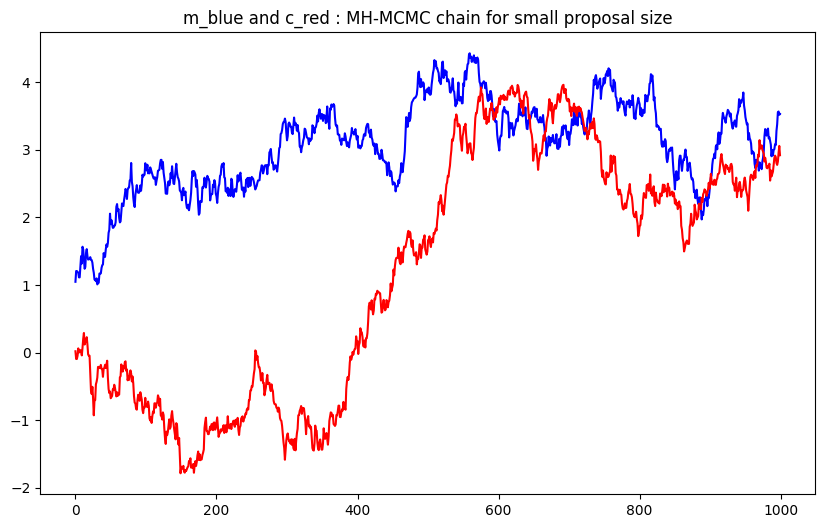

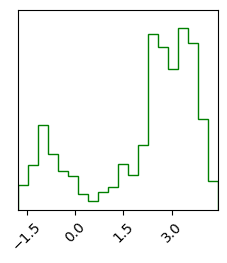

In [257]:
# Plot the corner plot
plt.figure(figsize=(10, 6))
samples_small = np.array(samples_small)
plt.plot(samples_small[:, 0], color='blue')
plt.plot(samples_small[:, 1], color='red')
plt.title('m_blue and c_red : MH-MCMC chain for small proposal size')
figure = corner.corner(samples_small, color = 'green')
plt.show()

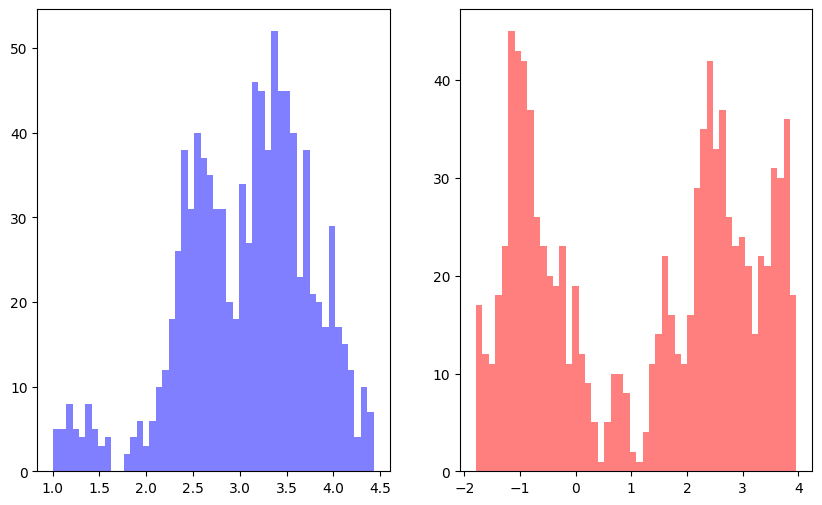

In [258]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(samples_small[:, 0], bins=50, alpha=0.5, label='M', facecolor='b')
ax[1].hist(samples_small[:, 1], bins=50, alpha=0.5, label='C', facecolor='r')
plt.show()

/home/hellsgate/.local/lib/python3.10/site-packages/arviz/data/base.py:220: UserWarning: More chains (1000) than draws (2). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


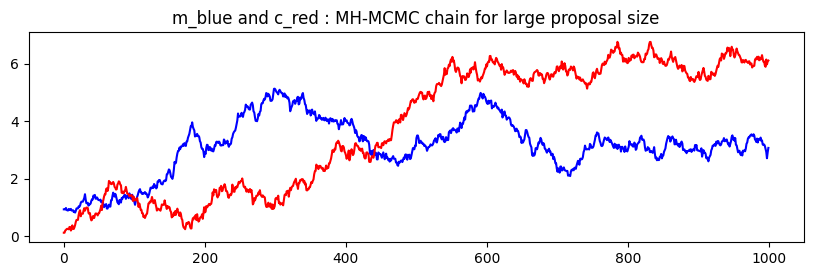

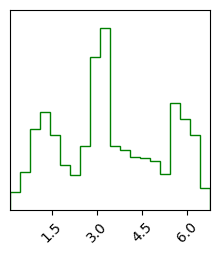

In [259]:
plt.figure(figsize=(10, 6))
samples_large = np.array(samples_large)
plt.subplot(2, 1, 1)
plt.plot(samples_large[:, 0], color='blue')
plt.plot(samples_large[:, 1], color='red')
plt.title('m_blue and c_red : MH-MCMC chain for large proposal size')
figure = corner.corner(samples_large, color = 'green')
plt.show()

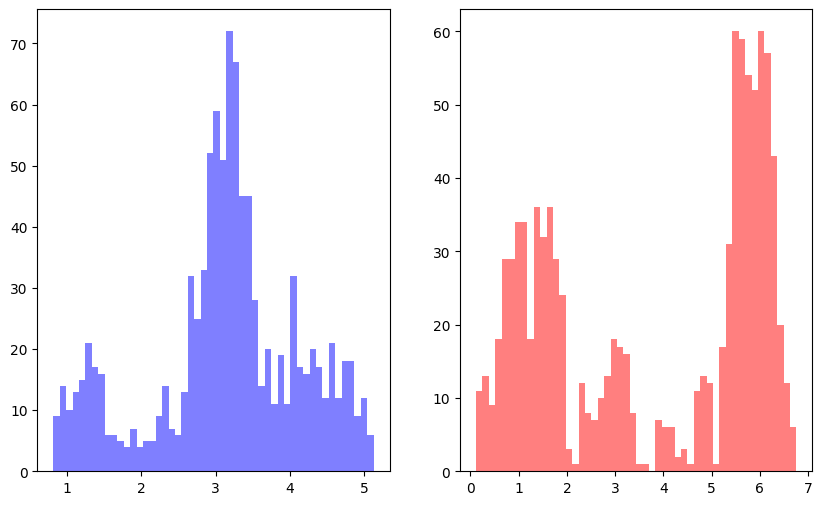

In [260]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(samples_large[:, 0], bins=50, alpha=0.5, label='M', facecolor='b')
ax[1].hist(samples_large[:, 1], bins=50, alpha=0.5, label='C', facecolor='r')
plt.show()

 f) Show how the acceptance probability changes as you change the size of the proposal distribution from very small (say 0.0001) to very large (say 100). For each case show the marginalized derived pdfs for each parameter (aka the corner plots).

In [261]:
# Run the MH-MCMC algorithm for small proposal size
samples_small = run_mhmcmc(1000, 0.0001)
samples_small = np.array(samples_small)

# Run the MH-MCMC algorithm for large proposal size
samples_large = run_mhmcmc(1000, 100)
samples_large = np.array(samples_large)


posterior_mean_small = np.mean(samples_small, axis=0)
posterior_mean_large = np.mean(samples_large, axis=0)

posterior_variance_small = np.var(samples_small, axis=0)
posterior_variance_large = np.var(samples_large, axis=0)

# Compare mean and variance of large and small propsal size
print(f"mean of small: {posterior_mean_small}")
print(f"variance of small: {posterior_variance_small}")

print(f"mean of small: {posterior_mean_large}")
print(f"variance of small: {posterior_variance_large}")


mean of small: [[-3.37486596]
 [-3.41314997]]
variance of small: [[6.38715934]
 [2.80454783]]
mean of small: [[ 3.81048349]
 [-1.74346478]]
variance of small: [[1.25740486]
 [0.96147411]]


g) Once you have settled on a `reasonable` proposal distribution, compute the average value of the parameter estimates under the posterior distribution, and their variances (for 10000 and 100000 trials).

h) Now start 10 independent chains at 10 random points in the parameter space. Write and apply a Gelman-Rubin convergence test, and deduce roughly how long the chains should be for convergence.

In [262]:
def run_chains(num_chains, chain_size, m_Sigma, c_Sigma):
    # Initialize an empty list to store the chains
    chains = []

    # Run multiple chains
    for _ in range(num_chains):
        # Random starting point
        m = np.random.uniform()
        c = np.random.uniform()

        # Create a new chain
        chain = []

        # Iterate through the chain length
        for _ in range(chain_size):
            # Propose a new state
            new_m, new_c = gaussian_Proposal(m, c, m_Sigma, c_Sigma)

            # Compute the acceptance probability
            accept_ratio = min(1, likelihood(new_m, new_c) / likelihood(m, c))

            # Accept the proposed state with probability acceptance_prob
            if np.random.uniform() < accept_ratio:
                m, c = new_m, new_c

            # Append the current state to the chain
            chain.append([m, c])

        # Add the chain to the list of chains
        chains.append(chain)

    return chains

# Run 10 chains of length 1000
chains = run_chains(10, 1000, 0.5, 0.5)


# Run the Gelman-Rubin convergence test
#gr_test = mcmc.run_GR_test(nchains=10, nburn=5000)
# Print the GR statistic
#print('Gelman-Rubin Statistic:', gr_statistic)
#gr_test = gelman_rubin(chains)
 
# Print the convergence result
#if gr_test[0]:
#    print('The chains have converged!')
#else:
#    print('The chains have not converged')